## Week 2

## Data preprocessing

In [1]:
import pandas as pd

dataframe = pd.read_csv("london-borough-profiles-jan2018.csv", encoding='unicode_escape')
dataframe = dataframe.drop(0)
dataframe.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
1,E09000001,E09000001,City of London,Inner London,8800.0,5326.0,290,30.3,43.2,11.4,...,6.0,5.6,NaN,2.6,129.0,.,.,.,.,.
2,E09000002,E09000002,Barking and Dagenham,Outer London,209000.0,78188.0,"3,611",57.9,32.9,27.2,...,7.1,3.1,28.5,7.3,228.0,Lab,0,100,0,36.5
3,E09000003,E09000003,Barnet,Outer London,389600.0,151423.0,"8,675",44.9,37.3,21.1,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,.,1.6,40.5
4,E09000004,E09000004,Bexley,Outer London,244300.0,97736.0,"6,058",40.3,39.0,20.6,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0,39.6
5,E09000005,E09000005,Brent,Outer London,332100.0,121048.0,"4,323",76.8,35.6,20.9,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


In [2]:
male_column = dataframe.columns[70]
female_column = dataframe.columns[71]

print(f'Retrieving columns: "{male_column}" and "{female_column}"')
dataframe_final = dataframe.loc[:, dataframe.columns.intersection([male_column, female_column])]
dataframe_final = dataframe_final.drop(dataframe[(dataframe_final[male_column] == '.') | (dataframe_final[female_column] == '.')].index).astype(float)
dataframe_final.head()

Retrieving columns: "Male life expectancy, (2012-14)" and "Female life expectancy, (2012-14)"


,"Male life expectancy, (2012-14)","Female life expectancy, (2012-14)"
2,77.6,82.1
3,82.1,85.1
4,80.4,84.4
5,80.1,85.1
6,81.4,84.9


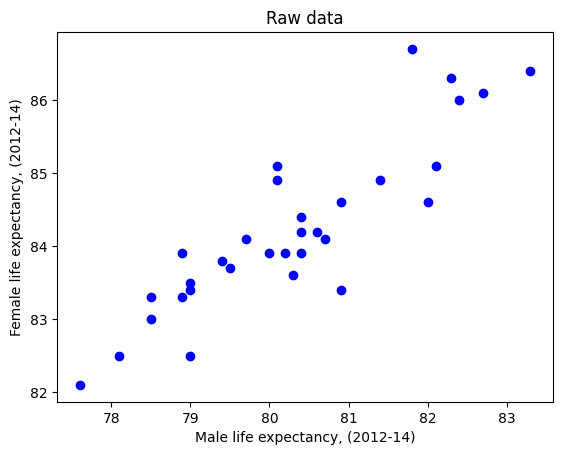

In [3]:
import matplotlib.pyplot as plt

x = dataframe_final[male_column]
y = dataframe_final[female_column]

plt.scatter(x, y, color='blue', marker='o')

plt.xlabel(male_column)
plt.ylabel(female_column)
plt.title('Raw data')
plt.show()

## Data partitioning

In [4]:
from sklearn import model_selection
def partition_and_plot_data(x, y, x_label, y_label):
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1)

    plt.scatter(x_train, y_train, color= 'blue', marker='o')
    plt.scatter(x_test, y_test, color= 'red', marker='D')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('Partitioned data')
    plt.legend(['Training set', 'Test set'])
    plt.show()

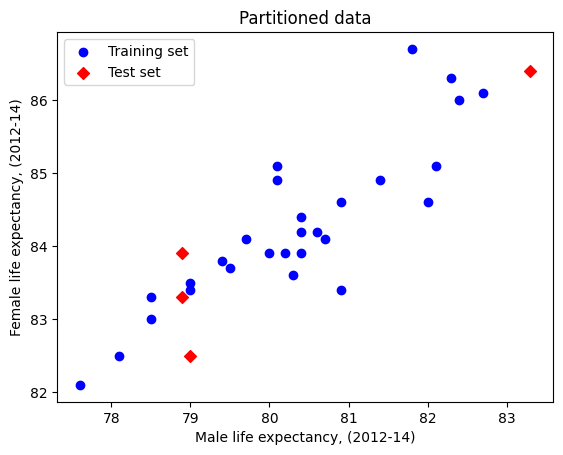

In [5]:
partition_and_plot_data(x.to_list(), y.to_list(), male_column, female_column)

## Generate synthetic data

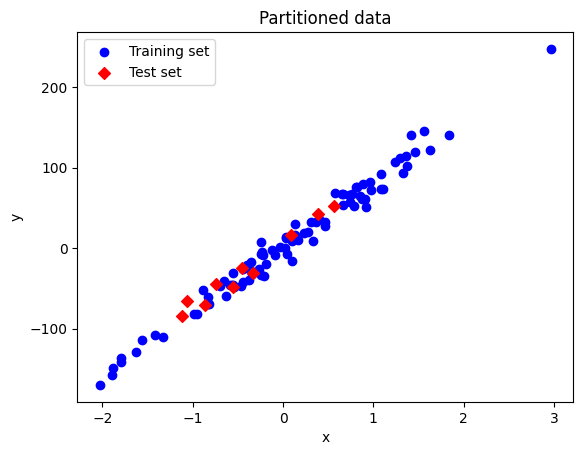

In [6]:
from sklearn import datasets
x_random, y_random, p = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, coef=True)
partition_and_plot_data(x_random.tolist(), y_random.tolist(), 'x', 'y')

## Linear Regression

In [7]:
def gradient_descent(M, x, w, y, alpha):
    for j in range(1, M):
        y_pred = w[0] + w[1] * x[j]
        output_difference = y[j] - y_pred
        w[0] = w[0] + (alpha * output_difference) / M
        w[1] = w[1] + (alpha * output_difference * x[j]) / M
    return w

In [8]:
def compute_error(M, x, w, y):
    error = 0
    for j in range(1, M):
        y_pred = w[0] + w[1] * x[j]
        error = error + (y[j] - y_pred) ** 2
    return error / M

In [9]:
import numpy as np

def compute_r2(M, x, w, y):
    u = 0
    v = 0
    y_mean = np.mean(y)
    for j in range(1, M):
        y_pred = w[0] + w[1] * x[j]
        u = u + (y[j] - y_pred) ** 2
        v = v + (y[j] - y_mean) ** 2
    return 1 - u / v

In [62]:
import numpy as np
def perform_linear_regression(alpha, number_of_plots, x, y, random_state=47, stop_condition = False, iterations = 100, stopping_condition = 0.001):
    w = [0, 0]
    _, axs = plt.subplots(int(number_of_plots + 2))
    plot_number = 0
    r2_list = []
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, random_state=random_state)
    i = 1
    error = 0
    error_prev = 100
    
    counter = 0
    while ((i < iterations  + 1) and not (np.abs(error_prev - error) <= stopping_condition)):
        w = gradient_descent(len(x_train), x_train.tolist(), w, y_train.tolist(), alpha)
        if (stop_condition):
            error_prev = error
        error = compute_error(len(x_train), x_train.tolist(), w, y_train.tolist())
        r2 = compute_r2(len(x_train), x.tolist(), w, y.tolist())
        r2_list.append(r2)
        if (counter % (int)((iterations + 1) / number_of_plots) == 0 and plot_number <= number_of_plots - 1):
            x_line = np.linspace(min(x), max(x))
            y_line = w[0] + w[1] * x_line
            axs[plot_number].plot(x_line, y_line)
            axs[plot_number].scatter(x_train, y_train, color= 'blue', marker='o')
            axs[plot_number].set(xlabel=male_column, ylabel=female_column)
            axs[plot_number].set_title(f'Iteration: {counter} \n Error: {error} \n $R^2$: {r2}')
            plot_number = plot_number + 1
        counter = counter + 1
        if (not stop_condition):
            i = i + 1

    x_line = np.linspace(min(x), max(x))
    y_line = w[0] + w[1] * x_line
    error = compute_error(len(x_test), x_test.tolist(), w, y_test.tolist())
    r2 = compute_r2(len(x_test), x_test.tolist(), w, y_test.tolist())
    axs[plot_number].plot(x_line, y_line)
    axs[plot_number].scatter(x_test, y_test, color= 'red', marker='D')
    axs[plot_number].set(xlabel=male_column, ylabel=female_column)
    axs[plot_number].set_title(f'Testing results \n Error: {error} \n $R^2$: {r2}')
    
    plot_number = plot_number + 1
    x_r2_plot = np.linspace(1, len(r2_list) + 1, len(r2_list))
    axs[plot_number].plot(x_r2_plot, r2_list)
    axs[plot_number].set(ylabel="$R^2$", xlabel="Number of iterations")
    axs[plot_number].set_title(f'$R^2$ \n $w_0$: {w[0]} $w_1$: {w[1]} \n Iterations total: {counter}')
    
    plt.subplots_adjust(bottom=0,
                        top=0.8*number_of_plots,  
                        hspace=0.9)
    plt.show()
    return w

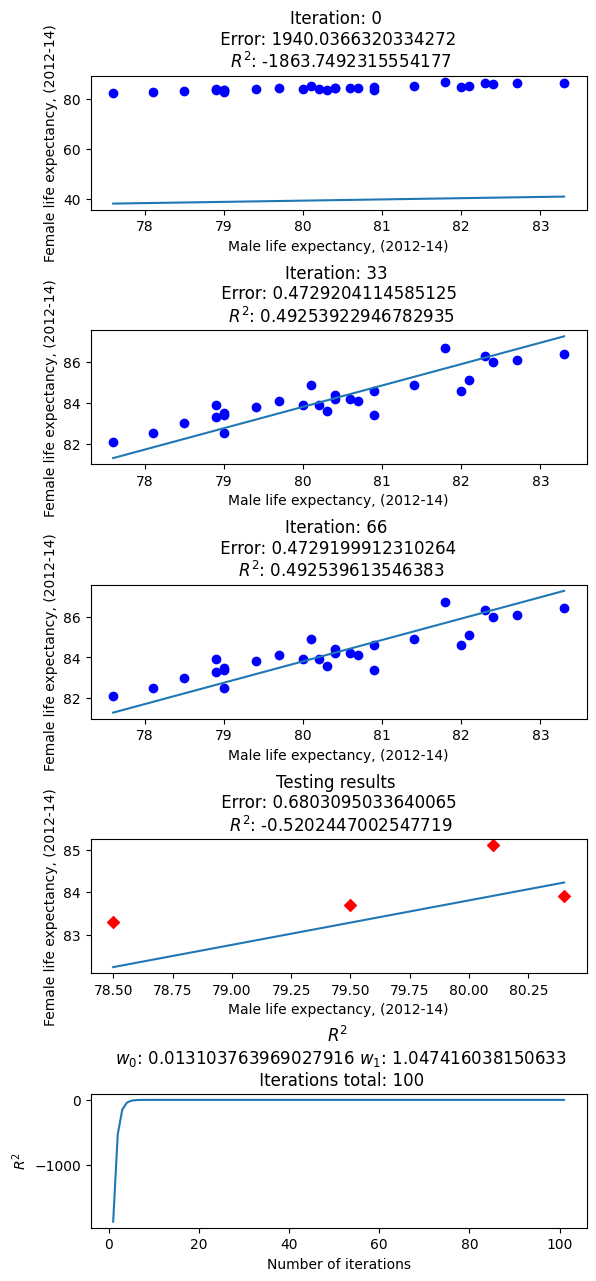

[0.013103763969027916, 1.047416038150633]

In [59]:
iterations = 100
alpha = 0.0001
number_of_plots = 3
perform_linear_regression(alpha, number_of_plots, x, y, iterations = iterations)

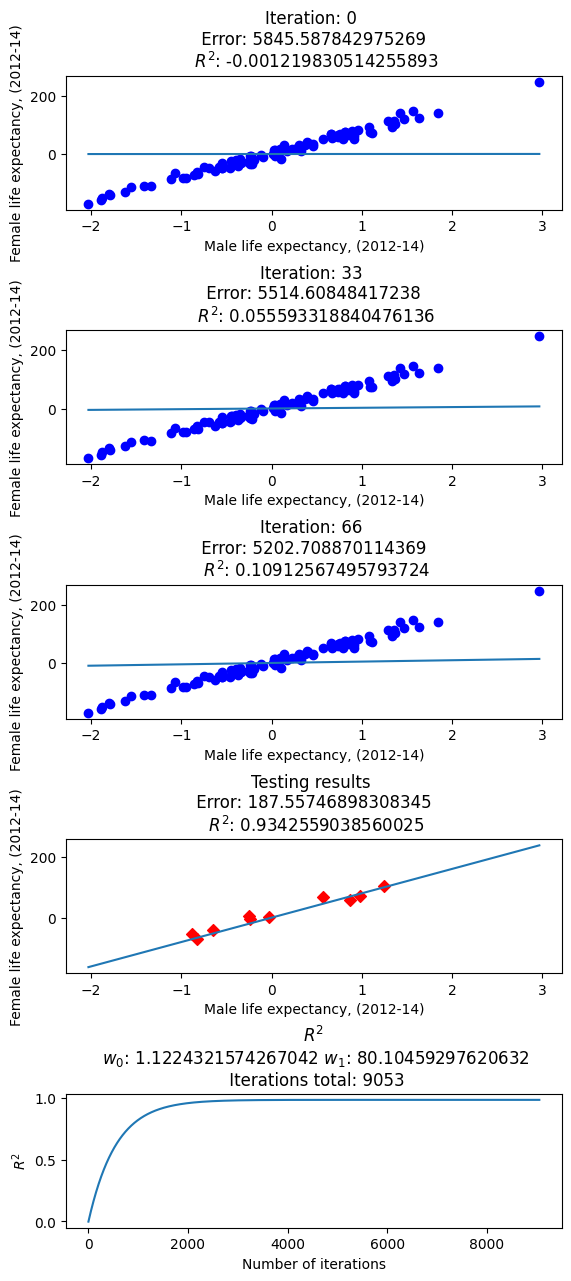

Expected p: 77.76932715092147, Estimated p: 80.10459297620632
Expected q: 0, Estimated q: 1.1224321574267042


In [70]:
alpha = 0.001
number_of_plots = 3
stopping_condition=1e-6
w = perform_linear_regression(alpha, number_of_plots, x_random.flatten(), y_random, stop_condition=True, stopping_condition=stopping_condition)
print(f'Expected p: {p}, Estimated p: {w[1]}')
print(f'Expected q: 0, Estimated q: {w[0]}')

array([ 0.56426377,  0.7338077 , -0.192268  ,  0.03865664,  0.30540288,
       -0.02867611, -0.58809898, -0.37489373, -0.43946264,  0.65413793,
       -0.81551683, -0.95061402, -0.69779196,  1.56411627,  0.87203917,
        1.46104292, -1.4155309 ,  0.97414947,  0.79035017,  0.91553111,
        0.09046039,  1.36921727, -0.63115106, -0.46629785,  0.3913972 ,
       -0.98110682, -1.6253192 , -0.82618768,  2.96544037,  1.33015753,
        0.01664704, -0.56309169,  1.6313072 ,  0.76086388, -1.79607644,
       -0.34753245, -1.88941103, -0.5541112 , -0.24592433, -0.33371393,
       -0.23801562, -1.55914184,  0.81684907, -1.11905553,  0.32875897,
       -1.87849327, -0.44562888, -0.88509535, -0.45495563,  0.10183165,
        0.89118884, -0.35296097,  0.90789892, -1.33101386,  0.46217028,
       -0.244647  ,  0.81138927,  1.84027429, -0.22697869,  0.65995774,
        0.85536005, -0.86216637, -0.21565319, -0.6497148 , -0.24079149,
        1.42192815,  0.13700865,  0.95867126,  1.08606782, -0.74